Title: "Bellabeat Case Study"

Author: "Ogunniyi peter iyanu"

Date: "2022-12-02"

Output: html_document

## OBJECTIVES:
​
**Business task:**
​
Analyze consumer use of the fitbit dataset to identify potential opportunities for growth and recommendation for the Bellabeat marketing strategy
​
**Analysis questions**
​
1. What are some trends in smart device usage?
​
2. How could these trends apply to Bellabeat customers?
​
3. How could these trends help influence Bellabeat marketing strategy?
​
​
## Prepare:
​
**Loading the packegaes required**

​
using library()
​

In [50]:
library(tidyverse)
library(tidyr)
library(dplyr)
library(here)
library(janitor)
library(skimr)
library(ggplot2)
library(readr)
library(lubridate)
library(ggpubr)

### Importing the dataset required for the analysis
​

**Note:** The datatype for the datasets has been formatted from character to date format in Excel

In [2]:
Activity<-read_csv("/kaggle/input/bellabeat-case-study/dailyActivity_merged.csv")
Calories<-read_csv("/kaggle/input/bellabeat-case-study/dailyCalories_merged.csv")
Intensities<-read_csv("/kaggle/input/bellabeat-case-study/dailyIntensities_merged.csv")
Steps<-read_csv("/kaggle/input/bellabeat-case-study/dailySteps_merged.csv")
Heartrate<-read_csv("/kaggle/input/bellabeat-case-study/heartrate_seconds_merged.csv")
METs<-read_csv("/kaggle/input/bellabeat-case-study/minuteMETsNarrow_merged.csv")
Sleep<-read_csv("/kaggle/input/bellabeat-case-study/sleepday.csv")
weight<-read_csv("/kaggle/input/bellabeat-case-study/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesD...
date  (1): ActivityDate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (2): Id, Calories
date (1): ActivityDay

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, V...
date (1): ActivityDay

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the

## Process:

viewing each dataset imported in order to get familiar with  them

In [3]:
head(Activity)
colnames(Activity)
head(Calories)
colnames(Calories)
head(Intensities)
colnames(Intensities)
head(Heartrate)
colnames(Heartrate)
head(METs)
colnames(METs)
head(Sleep)
colnames(Sleep)
head(Steps)
colnames(Steps)
head(weight)
colnames(weight)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

Id,ActivityDay,Calories
<dbl>,<date>,<dbl>
1503960366,2016-04-12,1985
1503960366,2016-04-13,1797
1503960366,2016-04-14,1776
1503960366,2016-04-15,1745
1503960366,2016-04-16,1863
1503960366,2016-04-17,1728


[1] "Id"          "ActivityDay" "Calories"

Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,728,328,13,25,0,6.06,0.55,1.88
1503960366,2016-04-13,776,217,19,21,0,4.71,0.69,1.57
1503960366,2016-04-14,1218,181,11,30,0,3.91,0.40,2.44
1503960366,2016-04-15,726,209,34,29,0,2.83,1.26,2.14
1503960366,2016-04-16,773,221,10,36,0,5.04,0.41,2.71
1503960366,2016-04-17,539,164,20,38,0,2.51,0.78,3.19


[1] "Id"                       "ActivityDay"             
 [3] "SedentaryMinutes"         "LightlyActiveMinutes"    
 [5] "FairlyActiveMinutes"      "VeryActiveMinutes"       
 [7] "SedentaryActiveDistance"  "LightActiveDistance"     
 [9] "ModeratelyActiveDistance" "VeryActiveDistance"

Id,Date,Value
<dbl>,<date>,<dbl>
2022484408,2016-04-12,97
2022484408,2016-04-12,102
2022484408,2016-04-12,105
2022484408,2016-04-12,103
2022484408,2016-04-12,101
2022484408,2016-04-12,95


[1] "Id"    "Date"  "Value"

Id,ActivityMinute,METs
<dbl>,<date>,<dbl>
1503960366,2016-04-12,10
1503960366,2016-04-12,10
1503960366,2016-04-12,10
1503960366,2016-04-12,10
1503960366,2016-04-12,10
1503960366,2016-04-12,12


[1] "Id"             "ActivityMinute" "METs"

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

Id,ActivityDay,StepTotal
<dbl>,<date>,<dbl>
1503960366,2016-04-12,13162
1503960366,2016-04-13,10735
1503960366,2016-04-14,10460
1503960366,2016-04-15,9762
1503960366,2016-04-16,12669
1503960366,2016-04-17,9705


[1] "Id"          "ActivityDay" "StepTotal"

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02,52.6,115.9631,22,22.65,TRUE,1.46e+12
1503960366,2016-05-03,52.6,115.9631,NA,22.65,TRUE,1.46e+12
1927972279,2016-04-13,133.5,294.3171,NA,47.54,FALSE,1.46e+12
2873212765,2016-04-21,56.7,125.0021,NA,21.45,TRUE,1.46e+12
2873212765,2016-05-12,57.3,126.3249,NA,21.69,TRUE,1.46e+12
4319703577,2016-04-17,72.4,159.6147,25,27.45,TRUE,1.46e+12


[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

Further previewed the data to detect missing values,duplicates etc

In [4]:
glimpse(Activity)
skim_without_charts(Activity)
glimpse(Calories)
skim_without_charts(Calories)
glimpse(Heartrate)
skim_without_charts(Heartrate)
glimpse(Intensities)
skim_without_charts(Intensities)
glimpse(METs)
skim_without_charts(METs)
glimpse(Sleep)
skim_without_charts(Sleep)
glimpse(Steps)
skim_without_charts(Steps)
glimpse(weight)
skim_without_charts(weight)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <date> 2016-04-12, 2016-04-13, 2016-04-14, 2016-04-…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,ActivityDate,0,1,2016-04-12,2016-05-12,2016-04-26,31,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
3,numeric,TotalSteps,0,1,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
4,numeric,TotalDistance,0,1,NA,NA,NA,NA,5.489702e+00,3.924606e+00,0,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
5,numeric,TrackerDistance,0,1,NA,NA,NA,NA,5.475351e+00,3.907276e+00,0,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
6,numeric,LoggedActivitiesDistance,0,1,NA,NA,NA,NA,1.081709e-01,6.198965e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
7,numeric,VeryActiveDistance,0,1,NA,NA,NA,NA,1.502681e+00,2.658941e+00,0,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
8,numeric,ModeratelyActiveDistance,0,1,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
9,numeric,LightActiveDistance,0,1,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01


── Data Summary ────────────────────────
                           Values  
Name                       Activity
Number of rows             940     
Number of columns          15      
_______________________            
Column type frequency:             
  Date                     1       
  numeric                  14      
________________________           
Group variables            None    

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 ActivityDate          0             1 2016-04-12 2016-05-12 2016-04-26
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5.09e+3          0
 3 TotalDistance              

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,ActivityDay,0,1,2016-04-12,2016-05-12,2016-04-26,31,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2320127002.0,4445114986,6.962181e+09,8877689391
3,numeric,Calories,0,1,NA,NA,NA,NA,2.303610e+03,7.181669e+02,0,1828.5,2134,2.793250e+03,4900


── Data Summary ────────────────────────
                           Values  
Name                       Calories
Number of rows             940     
Number of columns          3       
_______________________            
Column type frequency:             
  Date                     1       
  numeric                  2       
________________________           
Group variables            None    

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 ActivityDay           0             1 2016-04-12 2016-05-12 2016-04-26
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 Id                    0             1 4855407369. 2424805476. 1503960366
2 Calories              0             1       2304.        718.          0
          p25        p50         p75      

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,Date,0,1,2016-04-12,2016-05-12,2016-04-28,31,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,3.682046e+09,1.000649e+09,2022484408,2347167796,4020332650,4388161847,5553957443
3,numeric,Value,0,1,NA,NA,NA,NA,7.702470e+01,1.706900e+01,38,64,75,87,203


── Data Summary ────────────────────────
                           Values   
Name                       Heartrate
Number of rows             1048575  
Number of columns          3        
_______________________             
Column type frequency:              
  Date                     1        
  numeric                  2        
________________________            
Group variables            None     

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 Date                  0             1 2016-04-12 2016-05-12 2016-04-28
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 3682046279.  1000648791.  2022484408
2 Value                 0             1         77.0         17.1         38
         p25        p50   

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,ActivityDay,0,1,2016-04-12,2016-05-12,2016-04-26,31,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
3,numeric,SedentaryMinutes,0,1,NA,NA,NA,NA,9.912106e+02,3.012674e+02,0,7.297500e+02,1.057500e+03,1.229500e+03,1.440000e+03
4,numeric,LightlyActiveMinutes,0,1,NA,NA,NA,NA,1.928128e+02,1.091747e+02,0,1.270000e+02,1.990000e+02,2.640000e+02,5.180000e+02
5,numeric,FairlyActiveMinutes,0,1,NA,NA,NA,NA,1.356489e+01,1.998740e+01,0,0.000000e+00,6.000000e+00,1.900000e+01,1.430000e+02
6,numeric,VeryActiveMinutes,0,1,NA,NA,NA,NA,2.116489e+01,3.284480e+01,0,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02
7,numeric,SedentaryActiveDistance,0,1,NA,NA,NA,NA,1.606383e-03,7.346176e-03,0,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
8,numeric,LightActiveDistance,0,1,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01
9,numeric,ModeratelyActiveDistance,0,1,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00


── Data Summary ────────────────────────
                           Values     
Name                       Intensities
Number of rows             940        
Number of columns          10         
_______________________               
Column type frequency:                
  Date                     1          
  numeric                  9          
________________________              
Group variables            None       

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 ActivityDay           0             1 2016-04-12 2016-05-12 2016-04-26
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable            n_missing complete_rate    mean      sd         p0
1 Id                               0             1 4.86e+9 2.42e+9 1503960366
2 SedentaryMinutes                 0             1 9.91e+2 3.01e+2          0
3 L

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,ActivityMinute,0,1,2016-04-12,2016-05-12,2016-04-26,31,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,3.930563e+09,1.819697e+09,1503960366,2026352035,4020332650,5553957443,7086361926
3,numeric,METs,0,1,NA,NA,NA,NA,1.446963e+01,1.103463e+01,0,10,10,11,157


── Data Summary ────────────────────────
                           Values 
Name                       METs   
Number of rows             1048575
Number of columns          3      
_______________________           
Column type frequency:            
  Date                     1      
  numeric                  2      
________________________          
Group variables            None   

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate min        max        median    
1 ActivityMinute         0             1 2016-04-12 2016-05-12 2016-04-26
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 3930563120.  1819696857.  1503960366
2 METs                  0             1         14.5         11.0          0
         p25        p50        p75       p10

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,SleepDay,0,1,2016-04-12,2016-05-12,2016-04-27,31,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,5.000979e+09,2.060360e+09,1503960366,3977333714,4702921684,6962181067,8792009665
3,numeric,TotalSleepRecords,0,1,NA,NA,NA,NA,1.118644e+00,3.455207e-01,1,1,1,1,3
4,numeric,TotalMinutesAsleep,0,1,NA,NA,NA,NA,4.194673e+02,1.183447e+02,58,361,433,490,796
5,numeric,TotalTimeInBed,0,1,NA,NA,NA,NA,4.586392e+02,1.271016e+02,61,403,463,526,961


── Data Summary ────────────────────────
                           Values
Name                       Sleep 
Number of rows             413   
Number of columns          5     
_______________________          
Column type frequency:           
  Date                     1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 SleepDay              0             1 2016-04-12 2016-05-12 2016-04-27
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1          1
3 TotalMinutesAsleep         0             1        4

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,ActivityDay,0,1,2016-04-12,2016-05-12,2016-04-26,31,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4445114986.0,6962181067,8877689391
3,numeric,StepTotal,0,1,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7405.5,10727,36019


── Data Summary ────────────────────────
                           Values
Name                       Steps 
Number of rows             940   
Number of columns          3     
_______________________          
Column type frequency:           
  Date                     1     
  numeric                  2     
________________________         
Group variables            None  

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 ActivityDay           0             1 2016-04-12 2016-05-12 2016-04-26
  n_unique
1       31

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate        mean          sd         p0
1 Id                    0             1 4855407369. 2424805476. 1503960366
2 StepTotal             0             1       7638.       5087.          0
          p25         p50        p75       p100
1 2320127002  

,skim_type,skim_variable,n_missing,complete_rate,Date.min,Date.max,Date.median,Date.n_unique,logical.mean,logical.count,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<date>,<date>,<date>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Date,Date,0,1.00000000,2016-04-12,2016-05-12,2016-04-27,31,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,logical,IsManualReport,0,1.00000000,NA,NA,NA,NA,0.6119403,"TRU: 41, FAL: 26",NA,NA,NA,NA,NA,NA,NA
3,numeric,Id,0,1.00000000,NA,NA,NA,NA,NA,NA,7.009282e+09,1.950322e+09,1.503960e+09,6.962181e+09,6.962181e+09,8.877689e+09,8.877689e+09
4,numeric,WeightKg,0,1.00000000,NA,NA,NA,NA,NA,NA,7.203582e+01,1.392321e+01,5.260000e+01,6.140000e+01,6.250000e+01,8.505000e+01,1.335000e+02
5,numeric,WeightPounds,0,1.00000000,NA,NA,NA,NA,NA,NA,1.588118e+02,3.069542e+01,1.159631e+02,1.353638e+02,1.377889e+02,1.875032e+02,2.943171e+02
6,numeric,Fat,65,0.02985075,NA,NA,NA,NA,NA,NA,2.350000e+01,2.121320e+00,2.200000e+01,2.275000e+01,2.350000e+01,2.425000e+01,2.500000e+01
7,numeric,BMI,0,1.00000000,NA,NA,NA,NA,NA,NA,2.518522e+01,3.066963e+00,2.145000e+01,2.396000e+01,2.439000e+01,2.556000e+01,4.754000e+01
8,numeric,LogId,0,1.00000000,NA,NA,NA,NA,NA,NA,1.460000e+12,0.000000e+00,1.460000e+12,1.460000e+12,1.460000e+12,1.460000e+12,1.460000e+12


── Data Summary ────────────────────────
                           Values
Name                       weight
Number of rows             67    
Number of columns          8     
_______________________          
Column type frequency:           
  Date                     1     
  logical                  1     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: Date ─────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min        max        median    
1 Date                  0             1 2016-04-12 2016-05-12 2016-04-27
  n_unique
1       31

── Variable type: logical ──────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate  mean count           
1 IsManualReport         0             1 0.612 TRU: 41, FAL: 26

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    

**Observations**

There are no missing value,incorrect spelling and wrong formatting in the following dataset; Activity, Calories, Heartrate, instensities, METs, Sleep, steps except the weight dataset whuch has 65 missing values in the fat column

## Analyze:

Checkinig for the number of unique users using the n_distinct function

In [23]:
Activity %>% 
  summarise(Activity_participant=n_distinct(Activity$Id))
n_distinct(Calories$Id)
n_distinct(Heartrate$Id)
n_distinct(Intensities$Id)
n_distinct(METs$Id)
n_distinct(Sleep$Id)
n_distinct(Steps$Id)
n_distinct(weight$Id)

Activity_participant
<int>
33


[1] 33

[1] 7

[1] 33

[1] 27

[1] 24

[1] 33

[1] 8

**Observations**

Discovered 33 participants for Activity datasets, 33 for intensity,33 participants for Steps, 33 participant for calories , 27 participants for METs, 24 participants for sleep which is valid for our analysis. Also we have 7 participant for heartrate and 8participants for weight dataset which is too low for our analysis
​

**Quick summaries about each data frames**
​
* For the Activity dataframe

In [6]:
Activity %>% 
  select(TotalDistance, TotalSteps, SedentaryMinutes, Calories) %>% 
  summary()

 TotalDistance      TotalSteps    SedentaryMinutes    Calories   
 Min.   : 0.000   Min.   :    0   Min.   :   0.0   Min.   :   0  
 1st Qu.: 2.620   1st Qu.: 3790   1st Qu.: 729.8   1st Qu.:1828  
 Median : 5.245   Median : 7406   Median :1057.5   Median :2134  
 Mean   : 5.490   Mean   : 7638   Mean   : 991.2   Mean   :2304  
 3rd Qu.: 7.713   3rd Qu.:10727   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :28.030   Max.   :36019   Max.   :1440.0   Max.   :4900  

* For the Intensity data frame

In [7]:
Intensities %>% 
  select(LightlyActiveMinutes, FairlyActiveMinutes, VeryActiveMinutes, SedentaryMinutes) %>% 
  summary()

 LightlyActiveMinutes FairlyActiveMinutes VeryActiveMinutes SedentaryMinutes
 Min.   :  0.0        Min.   :  0.00      Min.   :  0.00    Min.   :   0.0  
 1st Qu.:127.0        1st Qu.:  0.00      1st Qu.:  0.00    1st Qu.: 729.8  
 Median :199.0        Median :  6.00      Median :  4.00    Median :1057.5  
 Mean   :192.8        Mean   : 13.56      Mean   : 21.16    Mean   : 991.2  
 3rd Qu.:264.0        3rd Qu.: 19.00      3rd Qu.: 32.00    3rd Qu.:1229.5  
 Max.   :518.0        Max.   :143.00      Max.   :210.00    Max.   :1440.0  

* For METs data frame

In [8]:
METs %>% 
  select(METs) %>% 
  summary()

      METs       
 Min.   :  0.00  
 1st Qu.: 10.00  
 Median : 10.00  
 Mean   : 14.47  
 3rd Qu.: 11.00  
 Max.   :157.00  

* For Sleep data frame

In [9]:
Sleep %>% 
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>% 
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

**Observations**
​
* From the Activity dataset, the following was deduced:
​

The average total step is 7638 which is below the total steps required for an adult according to the Center forDisease Control(CDC) 

The average sedentary minutes is 991.3 minutes(approximately 17hours) which is too high 

The average calories burnt is 991.2. This cannot be classified as goodor bad as the quantity of calories burned should variy based on the participant
​
* From intensities dataframe The summary shows that participants engaged more in light activies
​
* From METs dataframe The average METs is 14.47. METs is amountof energy used while sitting quitely. Physical activities too can be rate as METs(sedentary,light intensity,moderate intensity,vigorous intensity). The average METs is considered high as vigorous intensity uses 6.0+ METs
​
* For the sleep Dataframe An average user sleep once per day for 419.5 minutes which is approximately 7 hours.This is good as it falls under the CDC required time for sleep in order to get enough rest.When we subtract the average time in asleep from the Total time in bed, i discovered that an average user spends 38.6 minutes awake in bed whic is good. According to Health central people should not spend more than 1hour awake in bed as it causes insomnia
​

****

In [10]:
# Creating new columns called "Weekdays" and Totaldistance
Activity_1<-mutate(Activity,Weekdays=weekdays(Activity$ActivityDate))%>%
mutate(Activity,Totaldistance=VeryActiveDistance+ModeratelyActiveDistance+LightActiveDistance)

**merging Activity dataframe with Intensities dataframe**

In [11]:
Activity_2<- merge(Activity_1,Intensities, by="Id" ,all = TRUE)

## Share:

**Visualization**

Creating visuals usings ggplots to identify trends within the datasets

* **** 

* **Total Steps vs. Calories burnt**

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



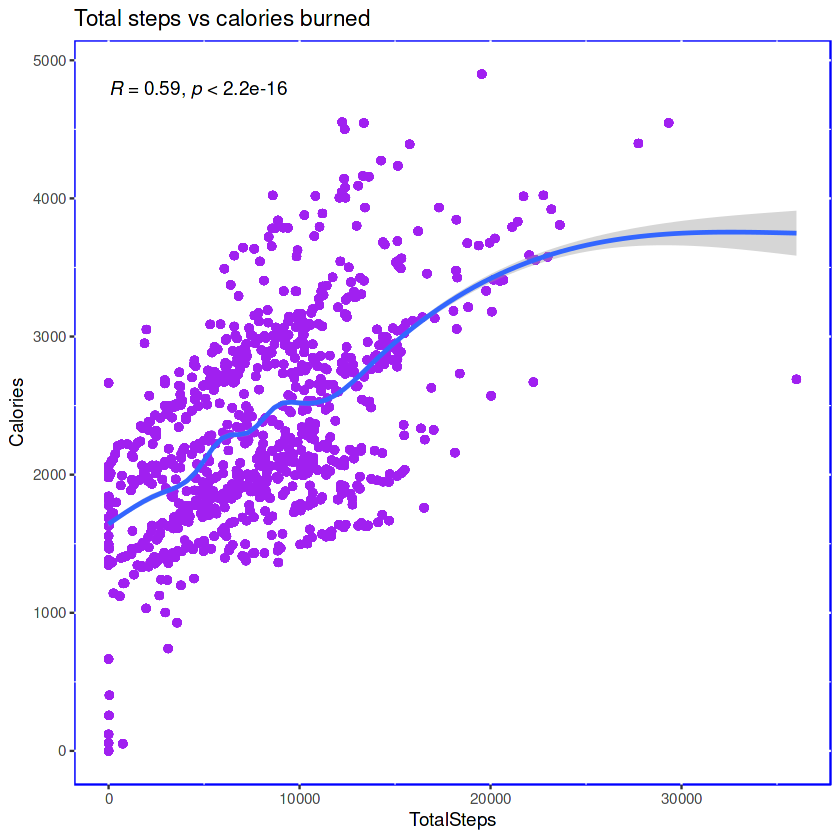

In [58]:
#Total Steps vs. Calories burnt
ggplot(data=Activity_2,aes(x= TotalSteps, y= Calories))+geom_point(color='purple')+
  geom_smooth()+labs(title = "Total steps vs calories burned")+
theme(panel.background=element_rect(fill='white',color='blue'))+stat_cor(method='pearson')

Visual1 shows that there is a positive trend(cor=0.59) between total steps taken daily and total calories burned.This means that the more steps taken by the user, the more calories they burned

* **Fitbit usage during weekdays**

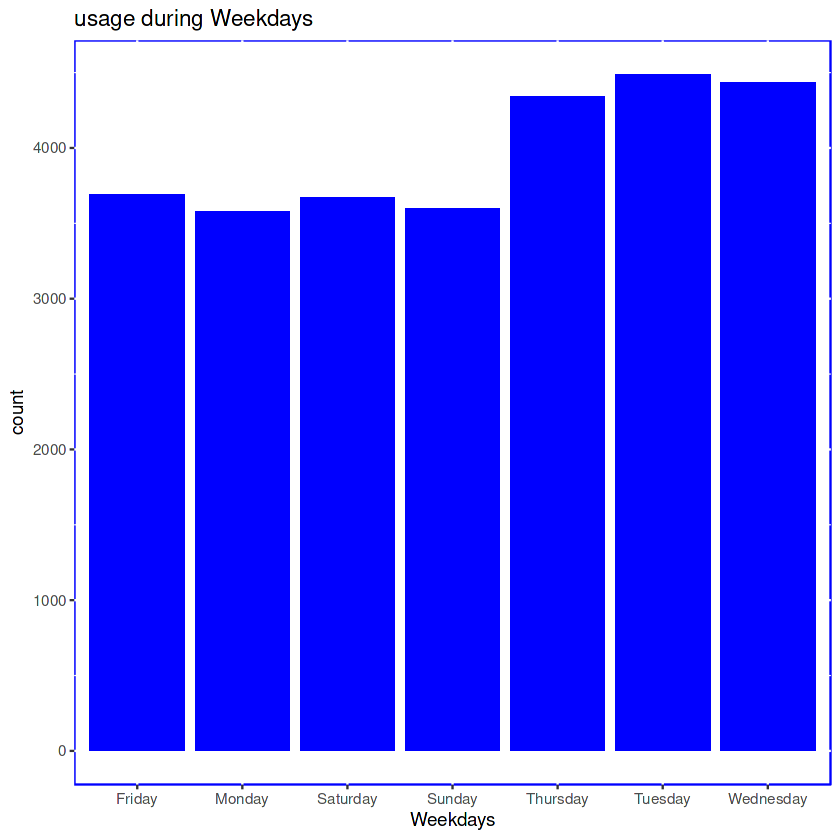

In [39]:
ggplot(data = Activity_2,aes(x=Weekdays))+
  geom_bar(fill="blue")+labs(title="usage during Weekdays")+theme(panel.background=element_rect(fill='white',color='blue'))

Visual2 shows the high usage of fitbit app by user during mid-week days(Tuesday, Wednesday, Thursday) and low usage on Fridays, Saturdays, Sundays and Mondays

* **Total distance vs calories burned**

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



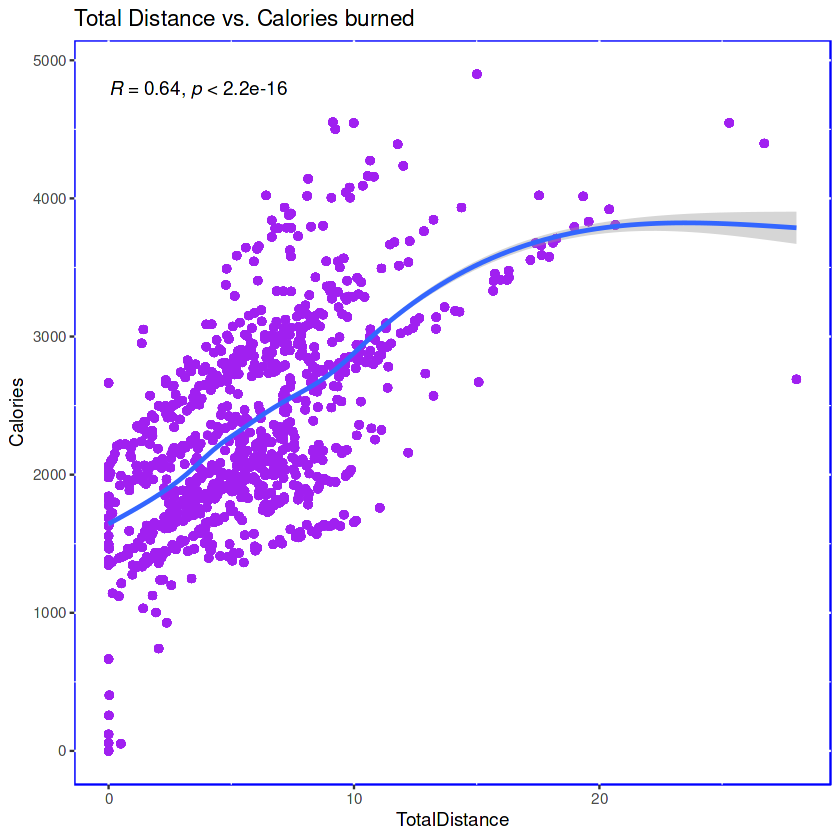

In [52]:
ggplot(data = Activity_2,aes(x=TotalDistance, y=Calories))+
  geom_point(color='purple')+geom_smooth()+labs(title = "Total Distance vs. Calories burned")+
theme(panel.background=element_rect(fill='white',color='blue'))+stat_cor(method='pearson')

* **Total time in bed vs. Total time asleep**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



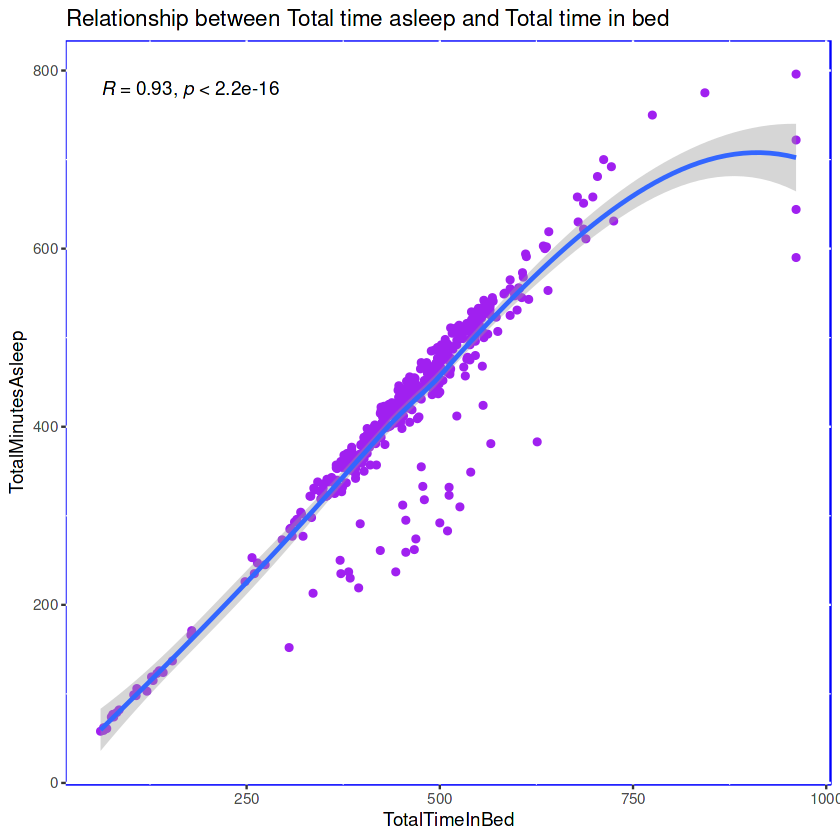

In [47]:
ggplot(data = Sleep,aes(x=TotalTimeInBed, y=TotalMinutesAsleep))+
  geom_point(color='purple')+geom_smooth()+labs(title = "Relationship between Total time asleep and Total time in bed ")+
theme(panel.background=element_rect(fill='white',color='blue'))+
stat_cor(method="pearson")

Visual4 shows a positive relationship(cor=0.93) between Total time in bed and Total time asleep.They time spent in bed and asleep are similar

**Act**

**Recommendation for the business**

Bellabeat is known for empowering women through providing data on their sleep, activity, stress, hudration levels, and reproductive health. Analyzing fitbit consumer can help make recommendation for promoting the growth of Bellabeat

The Bellabeat app should be completely revitalized and revamped.It should not only monitor daily activities but should be an interactive platform where user can share their testimonies on how effective the app is and to connect with each other

The CDC recommends working out with a friend to feel more motivated in trying workouts

**Recommendation for Bellabeat app and Membership**

1. create star ranking for users that uses the app more and reward very active users

2. create a social media platform where user can show or post their favorite workouts and health tips etc

3. Recommend user to take 10,000 steps per day and a notification to encourage them to met up with the goal

4. Recommend at least 7hours sleep daily and enable notification to met this goal

5. Enable notification to alert user if a user has spent an hour in bed awake

6. Alert users to engage in activities if the recommended sedentary time has been exceeded

7. Enable notification for user that are are interested in burning calories

8. Create a notification to encourage user work on weekends

9. Offer discounts for Bellabeat device product with membership

10. Give discount for members that refer a friend



 ### Limitations
​
This analysis has 30 users which is not a good representation of the Total population of women 
​
### Works cited
​
* how-many-hours-of-sleep-are-enough
  1998-2022 Mayo Foundation for Medical Education and Research (MFMER)
https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert
​
* daily step count
  March 24, 2020, in the Journal of the American Medical Association.
https://www.cdc.gov/media/releases/2020/p0324-daily-step-count.html
​
* How much sleep do you need
  By James Roland — Updated on January 25, 2022
 https://www.healthline.com/health/sleep/sleep-calculator
 
 * Exercise with a friend - Better Health
   Department of Health, State Government of Victoria, Australia ©        Copyright State of Victoria 2021.
https://www.betterhealth.vic.gov.au/health/healthyliving/Exercise-with-a-friend